In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error

import pickle

In [6]:
# Lets read the proeccessed data 

df=pd.read_csv("C:/Users/Daya/Desktop/DataSets/AQI/final_data.csv")

In [7]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,0.022013,0.000000,0.146789,0.823344,0.935897,0.036364,0.162500,0.134650,219.720833
1,0.034591,0.081232,0.134557,0.851735,0.858974,0.054545,0.166667,0.165171,182.187500
2,0.000000,0.100840,0.073394,0.880126,0.794872,0.054545,0.183333,0.165171,154.037500
3,0.059748,0.159664,0.100917,0.858044,0.666667,0.090909,0.320833,0.335727,223.208333
4,0.179245,0.310924,0.134557,0.813880,0.525641,0.181818,0.345833,0.364452,200.645833


In [8]:
# Independent Features 
x=df.drop('PM 2.5',axis=1)

# Dependent Features 
y=df['PM 2.5']

In [9]:
# SPlit the data in train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()

In [13]:
# Train the Model

regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# lets see how our model works train data 

regressor.score(x_train,y_train)

0.5432571322616789

In [15]:
# test it with real test data 

reg_pred=regressor.predict(x_test)

In [16]:
print("R2 Score : {0}".format(r2_score(y_test,reg_pred)))
print("RMSE     : {0}".format(np.sqrt(mean_squared_error(y_test,reg_pred))))

R2 Score : 0.48658018157060856
RMSE     : 56.7060904977962


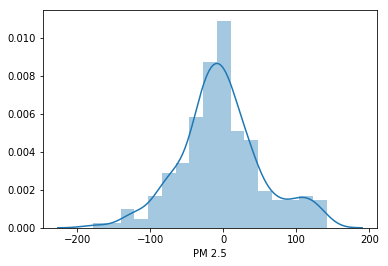

In [17]:
# Residual plot
residual = y_test - reg_pred
sns.distplot(residual)

In [ ]:
# Save the model

file=open("AQI_lin_regression.pk1",'wb')
pickle.dump(regressor,file)

# Polynomial Regression

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score 

# We are checking the results for multiple degrees

degrees = [2, 3, 4, 5, 6, 7, 8]  # Change degree "hyperparameter" here
normalizes = [True, False] # Change normalize hyperparameter here

for degree in degrees:
    for normalize in normalizes:
        poly_features = PolynomialFeatures(degree = degree)
        X_train_poly = poly_features.fit_transform(x_train)        
        x_test_poly=poly_features.fit_transform(x_test)
        polynomial_regressor = LinearRegression(normalize=normalize)
        polynomial_regressor.fit(X_train_poly, y_train)
        poly_pred=polynomial_regressor.predict(x_test_poly)
        
        diff=y_test - poly_pred
        
        r2_poly=r2_score(y_test,poly_pred)
        
        mse_poly=mean_squared_error(y_test,poly_pred)
        
        
        print(f"Degree : {degree} , Normalize : {normalize} , MSE = {mse_poly} , R2_Score = {r2_poly} ")

Degree : 2 , Normalize : True , MSE = 2677.500377311953 , R2_Score = 0.5724934666516175 
Degree : 2 , Normalize : False , MSE = 2677.500377311919 , R2_Score = 0.5724934666516229 
Degree : 3 , Normalize : True , MSE = 4837.090852791184 , R2_Score = 0.2276796823296945 
Degree : 3 , Normalize : False , MSE = 4837.090852792337 , R2_Score = 0.22767968232951052 
Degree : 4 , Normalize : True , MSE = 135988.26791817287 , R2_Score = -20.712741288990596 
Degree : 4 , Normalize : False , MSE = 165981.1205627695 , R2_Score = -25.501588591485852 
Degree : 5 , Normalize : True , MSE = 4623401.671330862 , R2_Score = -737.2013603195434 
Degree : 5 , Normalize : False , MSE = 7104524.031353072 , R2_Score = -1133.3529455570874 
Degree : 6 , Normalize : True , MSE = 7625207.030166173 , R2_Score = -1216.4884646711878 
Degree : 6 , Normalize : False , MSE = 9845285.850893369 , R2_Score = -1570.9601982520755 
Degree : 7 , Normalize : True , MSE = 10922501.917965267 , R2_Score = -1742.9552838189416 
Degree 

From the above data we can clearly see that Polynomial regression with degree 2 performing bettter than normal regression

In [20]:
# Save the model

file=open("AQI_Poly_regression.pk1",'wb')
pickle.dump(polynomial_regressor,file)